# V
Visa is a global payments technology company that enables consumers, businesses, banks, and governments to use digital currency. 

Visa is not a bank, but it partners with banks and other financial institutions to provide payment solutions. Visa's network allows for the transfer of funds between banks and merchants, facilitating electronic payments.

## Settings

In [3]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [4]:
ticker = 'V'
facts = get_facts(ticker=ticker)

## Income

Visa's net income has been steadily increasing over the years, reflecting the company's strong performance in the payments industry. The company's revenue is primarily generated from transaction fees, which are charged to banks and merchants for processing payments.

In the last 10 years, Visa's net income has only decreased twice, in 2016 and 2020. The decrease in 2016 was due to a one-time charge related to the acquisition of Visa Europe, while the decrease in 2020 was primarily due to the impact of the COVID-19 pandemic on global consumer spending.

In [5]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2020-09-30,10866000000,2020
14,2021-09-30,12311000000,2021
15,2022-09-30,14957000000,2022
16,2023-09-30,17273000000,2023
17,2024-09-30,19743000000,2024


## Income Growth (%)

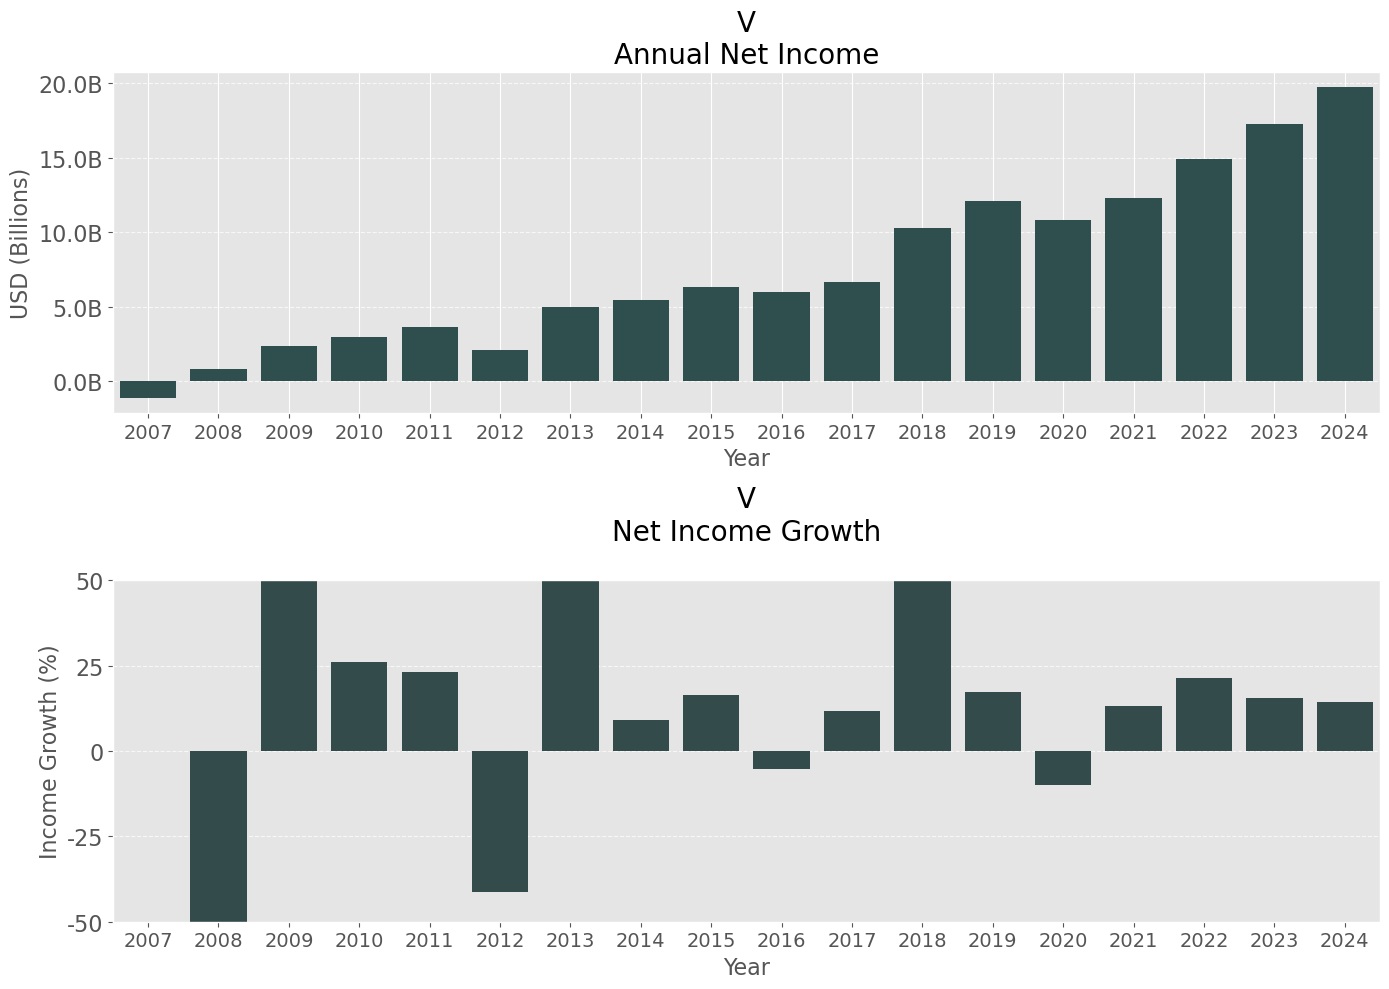

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

The stock price of visa has been on a steady upward trend over the past decade.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


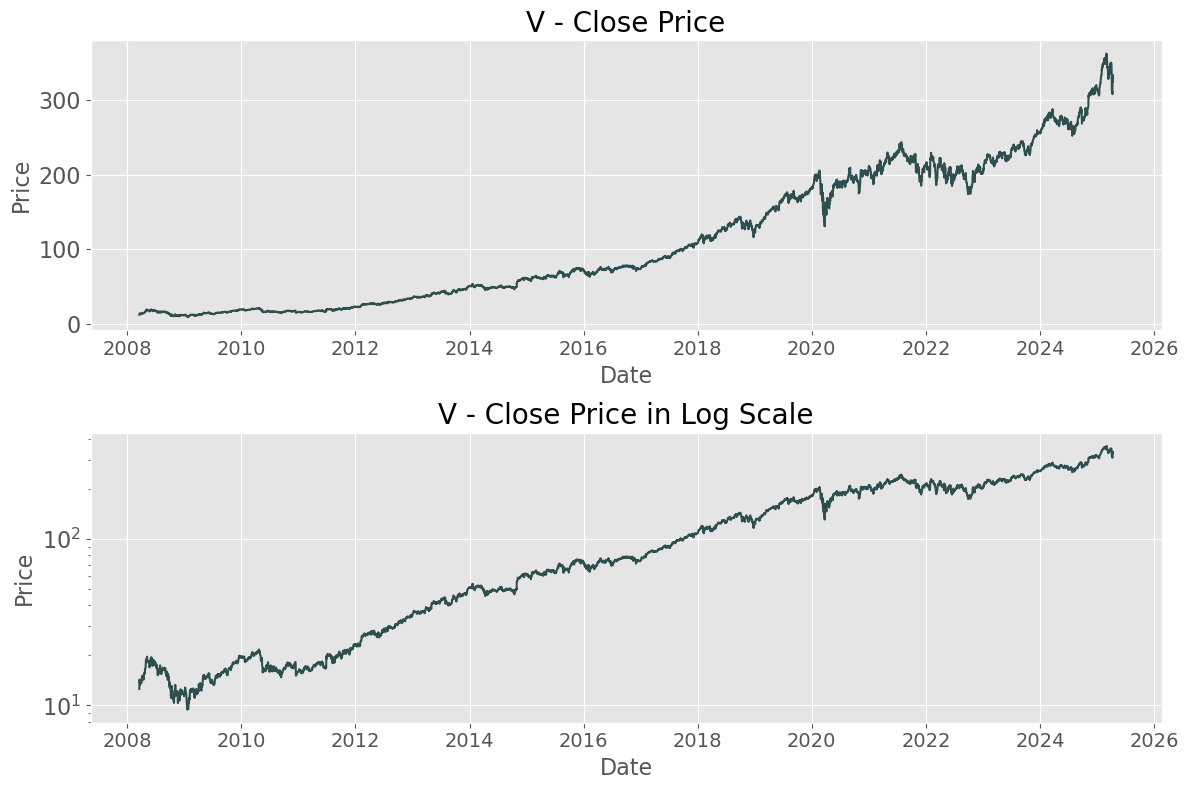

In [7]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

Visa has a history of paying dividends to its shareholders. The company has consistently increased its dividend payments over the years, reflecting its strong financial performance and commitment to returning value to shareholders.

In [8]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
13,2020-09-30,2664000000,2020
14,2021-09-30,2798000000,2021
15,2022-09-30,3203000000,2022
16,2023-09-30,3751000000,2023
17,2024-09-30,4217000000,2024


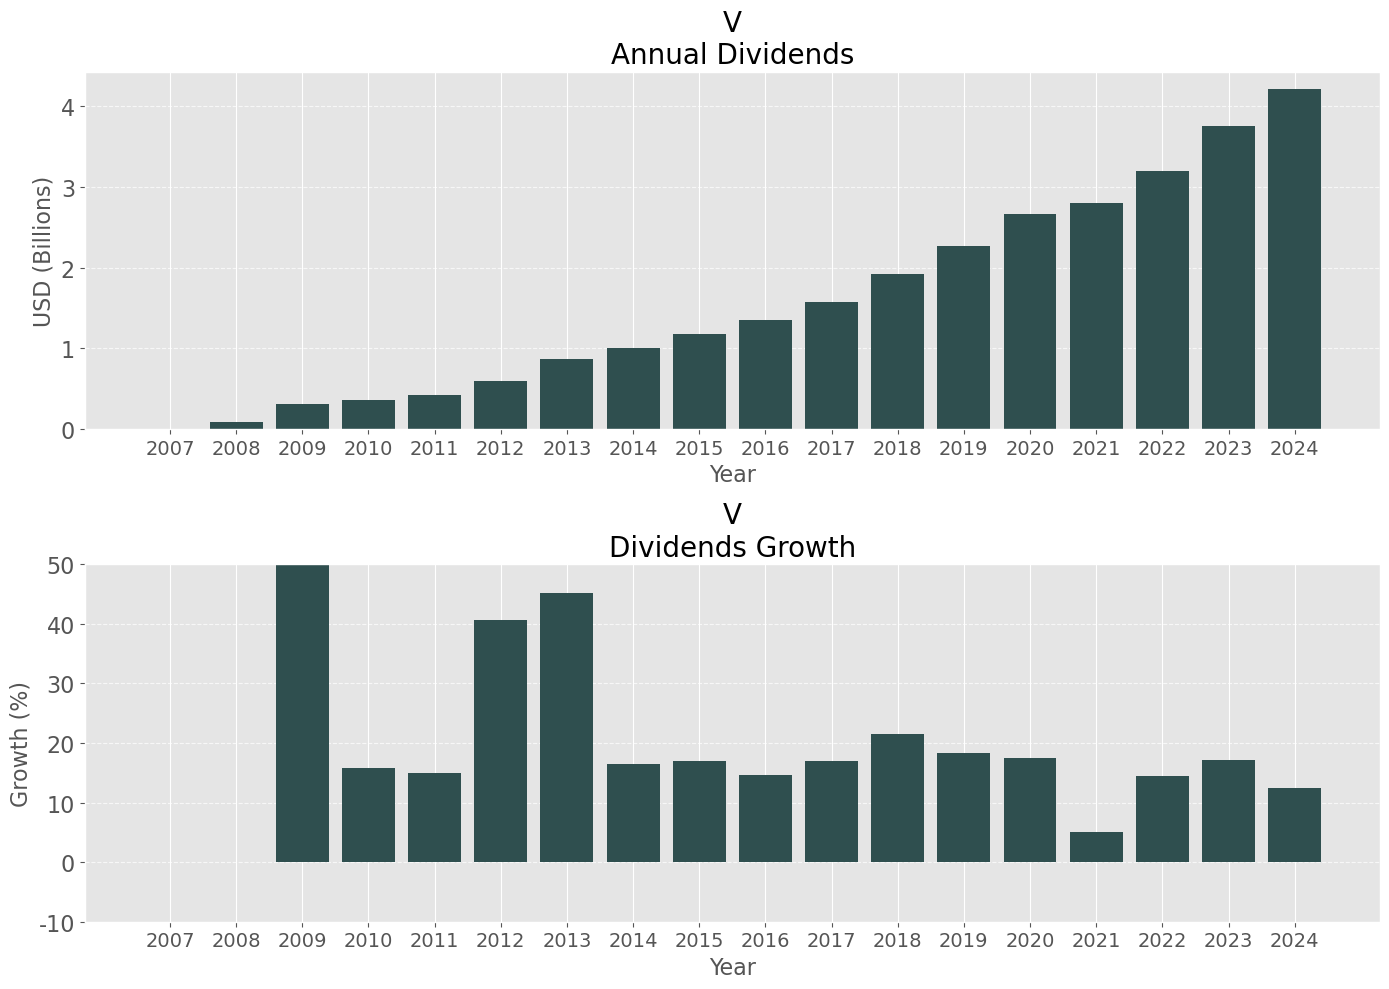

In [9]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=50, ystep=10, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio of Visa has been increasing since IPO, but the upward trend has slowed down in the last 5 years. The company's long-term P/E ratio is converging towards 25, which is slightly less than the current P/E ratio of 30. This suggests that the stock may be overvalued at the moment.  

It was a different story when I bought Visa at 308 few days ago. I bought Visa at 308 dollars, which was a P/E ratio of 26.88. This was a good entry point for the stock, as it was trading at a reasonable valuation compared to its historical P/E ratio.

In [12]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for V: 29.10


[*********************100%***********************]  1 of 1 completed


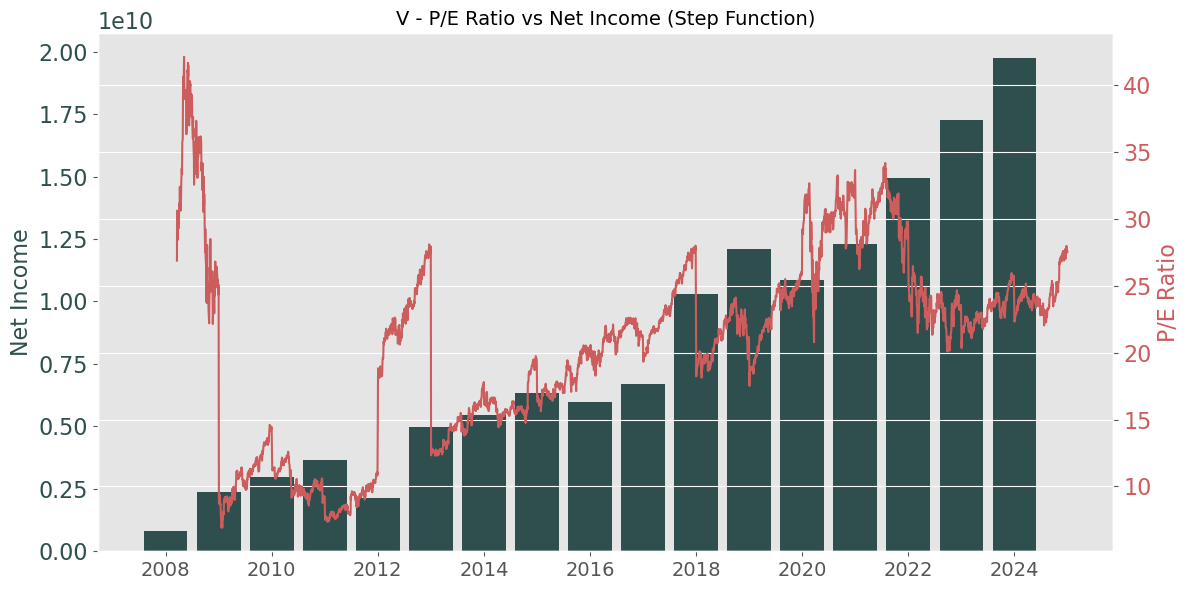

In [13]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

Visa has grown steadily over the years, and its stock price has increased significantly. It was a good deal when I bought it at 308 dollars, as the P/E ratio was reasonable compared to its historical average. Now, the stock is trading at a higher P/E ratio so I will hold it for a while.